# Summary

This notebook studies SIR model in three aspects:

* In Part One, I study the __Deterministic SIR Model__ with theoretical analysis and numerical analysis;

* In Part Two, I study the __Stochastic SIR Model__ with numerical analysis;

* In Part Three, I study the __Stochastic SIR Model__ on Barabási–Albert network and Erdős–Rényi–Gilbert network.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import combinations
from scipy.sparse import csr_matrix
from scipy.optimize import newton
from random import random

# SIR Model

In a $S-I-R$ model, we categorize hosts within a population as:
    * Susceptible (if previously unexposed to the pathogen), 
    * Infected (if currently colonized by the pathogen), and 
    * Recovered (if they have successfully cleared the infection)

<div>
<img src="./img/SIR_model.png" width="600"/>
</div>

In this model and contrary to what we have seen in the S-I model, those infected can move to the recovered class once they have fought off the infection. 

* Generally, it is observed that the amount of time spent in the infectious class is distributed around some mean value, which can be often estimated accurately from clinical data. In other words, we want to model the probability of an individual moving from $I \rightarrow R$

* Also, we want this probability to be dependent on how long they have been in the $I$ class. 

* Modelers often make the simplifying assumption that the ___recovery rate___ $\mu$ is constant. The inverse of the recovery rate ($1/\mu$) gives us the ___infectious period___ of the pathogen.

* Lastly, transitions from $S \rightarrow I$ are still governed by the transmission rate $\beta$. If we assume a frequency dependent (or mass action) transmission mechanism, we can derive the ___force of infection___ as :

$$\lambda = \frac{\beta I}{N}$$


# Part One: Deterministic SIR Model

* The actual epidemic model can now be described by the following set of equations:

$$
\begin{align*}
S_{t+1} \; =& \; S_{t} - \frac{\beta I_{t}}{N}S_{t} \\
I_{t+1} \; =& \; I_{t} + \frac{\beta I_{t}}{N}S_{t} - \mu I_{t} \\
R_{t+1} \; =& \; R_{t} + \mu I_{t} \\
\end{align*}
$$

where $N$ denotes the total population of individuals

In terms of differential equations, we can write the $S-I-R$ model as:

$$
\begin{align*}
\frac{ds(t)}{dt} \; =& \; -\beta  i(t)s(t) \\
\frac{di(t)}{dt} \; =& \;   \beta i(t)s(t) - \mu i(t) \\
\frac{dr(t)}{dt} \; =& \;   \mu i(t) \\
\end{align*}
$$

where we are using the same convention as last time of defining the number of individuals as fractions over the total population (i.e., $s+i+r=1$ )

* At the beginning, we have - by definition - that these two conditions hold:

$$ s(0) \sim 1$$

$$ i(0) \sim 0$$

* Given these assumptions, we can simplify our equation for the dynamics of the number of infectious individuals and obtain this:

$$ \frac{di(t)}{dt} \; = \;   \beta i(t) - \mu i(t)  $$

* Then, the disease will spread only if:

$$ \frac{di(t)}{dt} \; = \;   (\beta  - \mu )i(t) > 0  $$

* That is, when:

$$ (\beta  - \mu ) > 0  $$

* Or simply,

$$ \frac{\beta}{\mu}> 1  $$

* This quantity is called ____basic reproduction number $R_0$____ and it is defined as _the average number of secondary cases generated by a primary case in an entirely susceptible population_

$$R_0 = \frac{\beta}{\mu}$$

* In other words, a pathogen can invade a population only if $R_0 > 1$. The intuition behind this is that any infection that, on average, cannot successfully transmit to more than one new host is not going to spread. Notice that the expression of the $R_0$ is simply the average number of individuals infected directly by infected individuals during his infectious period in a fully susceptible population

$$R_0 = \frac{\beta}{\mu}$$

* $\beta$ is the average number of infections generated by an individual in a unitary time step
* $1/\mu$ is the average infectious period of an individual

* The ___long term dynamics___ of the $S-I-R$ model, or the fraction of susceptibles vary over time, can be divided:

$$\frac{ds(t)}{dt} \; = \; -\beta  i(t)s(t) $$

by:

$$\frac{dr(t)}{dt} \; = \;   \mu i(t) $$

We get:

$$\frac{ds}{dr} \; = \; -\frac{\beta s}{\mu} = -R_0 s  $$

* Then, if we integrate with respect to $r$ we get:

$$ s(t) = s(0) e ^{-r(t)R_0} $$


assuming $r(0) = 0$.

$$ s(t) = s(0) e ^{-r(t)R_0} $$

* Notice that the term in the exponential is always going to be positive. Therefore, there will always be some susceptibles in the population who escape infection, i.e., the chain of transmission eventually breaks due to the decline in infectives, not due to a complete lack of susceptibles.

* We can also look at the relationship between the $R_0$ and the total fraction of the population who eventually contract the infection, i.e., we can try to find the solution of $r(\infty)$:

$$ s(\infty) = 1 - r(\infty) = s(0)e^{-r(\infty)R_0} $$

* This yields to the _transcendental equation_:

$$  1 - r(\infty) - s(0)e^{-r(\infty)R_0} = 0 $$

* We can find a solution using numerical approximations

* We can write the temporal dynamics of this model

$$
\begin{align*}
S(t+dt) \; =& \; S(t) - \beta I(t)\frac{S(t)}{N}dt \\
I(t+dt) \; =& \; I(t) + \beta I(t)\frac{S(t)}{N}dt \\
\end{align*}
$$

where $N$ denotes the total population of individuals

* $\frac{S(t)}{N}$ is the probability of meeting a susceptible individual per unit of time

* $\frac{I(t)S(t)}{N}$ is the average number of susceptibles that infected individuals meet per unit of time

* $\frac{\beta I(t) S(t)}{N}$ is the average number of susceptibles that become infected per unit of time

* We can also define another quantity, the so-called ___force of infection___ $\lambda$, which is the the _per capita_ rate at which susceptible individuals contract the infection, i.e. the rate at which new infectious people are produced.

   $$\lambda = \frac{\beta I}{N}$$

* If we take the limit of the previous set of equations for $dt \rightarrow 0$ we get that:

$$
\begin{align*}
\frac{dS(t)}{dt} \; =& \; -\beta \frac{ I(t)S(t)}{N} \\
\frac{dI(t)}{dt} \; =& \;   \beta\frac{I(t)S(t)}{N} \\
\end{align*}
$$

where $N$ denotes the total population of individuals

* However, normally it is convenient to re-define the variables as fractions with respect to the total population (since that is constant). Therefore, the equations become:

$$
\begin{align*}
\frac{ds(t)}{dt} \; =& \; -\beta  i(t)s(t) \\
\frac{di(t)}{dt} \; =& \;   \beta i(t)s(t) \\
\end{align*}
$$

where $s(t) = S(t)/N$ and $i(t) = I(t)/N$. 

* Also, since we are assuming that the population is constant over time (i.e. no births or deaths), we can further simplify the system to just one equation using the fact that: $$i(t)+s(t) = 1 $$

$$\frac{di(t)}{dt}  =   \beta  i(t)(1-i(t)) $$


* This can be solved from:

$$\frac{di}{i(1-i)}  =    \beta  dt $$


$$\int\frac{1}{i(1-i)}di  = \int  \beta \; dt $$


$$\log\left(\frac{i}{1-i}\right)  =  \beta t + C $$


$$\frac{i}{1-i}  =  e^{\beta t + C}  $$


$$\frac{i}{1-i}  =  e^{\beta t} K  $$


$$i  =  (1-i)e^{\beta t} K  $$


$$i(1+Ke^{\beta t})  =  Ke^{\beta t}   $$


$$i  =  \frac{Ke^{\beta t}}{1+Ke^{\beta t}}   $$


And since:

$$ K = \frac{i_0}{1-i_0} $$

The solution is:

$$i  =  \frac{i_0e^{\beta t}}{1-i_0+i_0e^{\beta t}}   $$


* This equation is also called _logistic growth equation_

In [2]:
def r_inf(x0,R0):
    return 1-x0-np.exp(-x0*R0)

R0s = np.linspace(0,5,1000)
R_infty = [newton(lambda x: r_inf(x, R0),  0.5) for R0 in R0s]

Text(0.5, 0, '$R_0$')

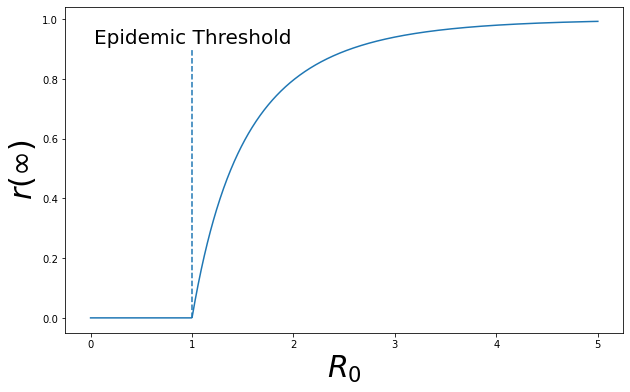

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(R0s,R_infty)
ax.vlines(1,0,0.9, linestyle='dashed')
ax.text(1.01,0.92,'Epidemic Threshold',fontdict={'fontsize':20, 'ha':'center'})
ax.set_ylabel('$r(\infty)$', fontsize=30)
ax.set_xlabel('$R_0$', fontsize=30)

In [4]:
def sir_deterministic(N,I0,beta,mu,T):
    S = np.zeros(T+1)
    I = np.zeros(T+1)
    R = np.zeros(T+1)

    S[0] = N-I0
    I[0] = I0
    
    
    for t in range(1,T+1):
        S[t] = S[t-1] - beta*S[t-1]*I[t-1]/N
        I[t] = I[t-1] + beta*S[t-1]*I[t-1]/N - mu*I[t-1]
        R[t] = R[t-1] + mu*I[t-1]
    
    return S,I,R
    

Text(0, 0.5, 'Number of individuals')

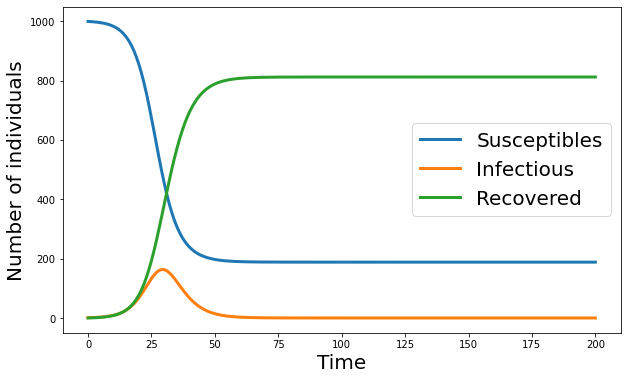

In [5]:
N = 1000
I0 = 1
beta = 0.50
mu = 0.25
T = 200
S,I,R = sir_deterministic(N,I0,beta,mu,T)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S, label='Susceptibles',lw=3)
ax.plot(I, label='Infectious', lw=3)
ax.plot(R, label='Recovered', lw=3)
ax.legend(fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

# Part Two: Stochastic SIR Model

In [6]:
def sir_stochastic(N, I0, beta,mu, T, num_replications):
    S = np.zeros((T+1,num_replications))
    I = np.zeros((T+1,num_replications))
    R = np.zeros((T+1,num_replications))
    S[0,:] = N-I0
    I[0,:] = I0

    for b in range(0,num_replications):
        for t in range(1,T + 1):
            p = beta*I[t-1,b] / N # force of infection
            new_infected = np.random.binomial(S[t-1,b], p)
            new_recovered = np.random.binomial(I[t-1,b],mu)
            S[t,b] = S[t-1,b] - new_infected
            I[t,b] = I[t-1,b] + new_infected - new_recovered
            R[t,b] = R[t-1,b] + new_recovered
            
    return S,I,R

In [7]:
N = 1000
I0 = 10
beta = 0.5
mu = 0.25
T = 200
B = 200

S,I,R = sir_stochastic(N,I0,beta,mu,T,B)
Sd,Id,Rd = sir_deterministic(N,I0,beta,mu,T)

Text(0, 0.5, 'Number of individuals')

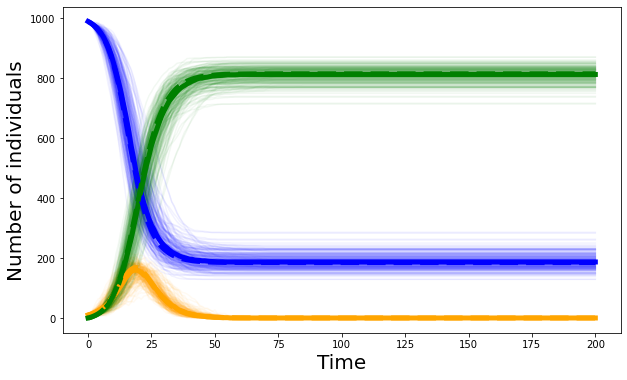

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
__ = ax.plot(S, color='blue', alpha=0.05)
__ = ax.plot(I, color='orange', alpha=0.05)
__ = ax.plot(R, color='green', alpha=0.05)
ax.plot(np.median(S,axis=1), lw=5, color='blue')
ax.plot(np.median(I,axis=1), lw=5, color='orange')
ax.plot(np.median(R,axis=1), lw=5, color='green')

ax.plot(Sd,'--', lw=5, color='blue')
ax.plot(Id,'--', lw=5, color='orange')
ax.plot(Rd,'--', lw=5, color='green')

ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

## Confidence Intervals

Text(0, 0.5, 'Number of individuals')

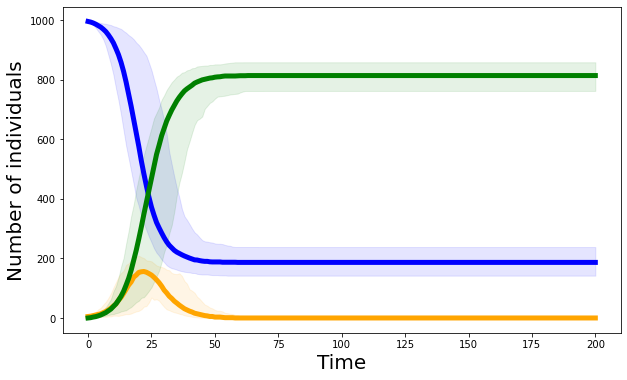

In [9]:
N = 1000
I0 = 5
beta = 0.5
mu = 0.25
T = 200
B = 200

S,I,R = sir_stochastic(N,I0,beta,mu,T,B)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.median(S,axis=1), lw=5, color='blue')
ax.plot(np.median(I,axis=1), lw=5, color='orange')
ax.plot(np.median(R,axis=1), lw=5, color='green')

time = np.arange(S.shape[0])

ax.fill_between(time, np.percentile(S,2.5,axis=1), np.percentile(S,97.5,axis=1), color='blue', alpha=0.10)
ax.fill_between(time, np.percentile(I,2.5,axis=1), np.percentile(I,97.5,axis=1), color='orange', alpha=0.10)
ax.fill_between(time, np.percentile(R,2.5,axis=1), np.percentile(R,97.5,axis=1), color='green', alpha=0.10)



ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

## Incidence curve

An important quantity people care about is the new infected population per day or per week, i.e. the incidence curve.

In [10]:
def sir_stochastic_incidence(N, I0, beta,mu, T, num_replications):
    S = np.zeros((T+1,num_replications))
    I = np.zeros((T+1,num_replications))
    R = np.zeros((T+1,num_replications))
    incidence = np.zeros((T+1,num_replications)) # <<<<<<<<<<<<<
    S[0,:] = N-I0
    I[0,:] = I0

    for b in range(0,num_replications):
        for t in range(1,T + 1):
            p = beta*I[t-1,b] / N
            new_infected = np.random.binomial(S[t-1,b], p)
            incidence[t,b] = new_infected # <<<<<<<<<<<<<
            new_recovered = np.random.binomial(I[t-1,b],mu)
            S[t,b] = S[t-1,b] - new_infected
            I[t,b] = I[t-1,b] + new_infected - new_recovered
            R[t,b] = R[t-1,b] + new_recovered
            
    return S,I,R, incidence 

Text(0, 0.5, 'Incidence curve')

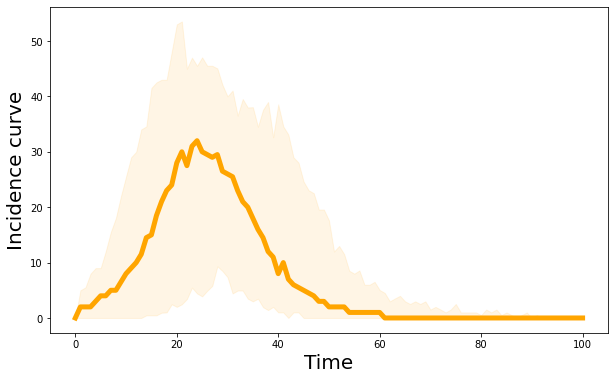

In [11]:
N = 1000
I0 = 5
beta = 0.4
mu = 0.2
T = 100
B = 100

S,I,R, incidence = sir_stochastic_incidence(N,I0,beta,mu,T,B)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.median(incidence,axis=1), lw=5, color='orange')

time = np.arange(S.shape[0])

ax.fill_between(time, np.percentile(incidence,2.5,axis=1), np.percentile(incidence,97.5,axis=1), \
                color='orange', alpha=0.10)

ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Incidence curve', fontsize=20)

# Part Three: Stochastic SI Model on Barabási–Albert network and Erdős–Rényi–Gilbert network

In [12]:
def generate_ba(N, m, m0=2):    
    if m>m0:
        raise NameError('Error! m cannot be larger than m0!')
    
    degrees = np.zeros((N,))
    nodes = np.arange(N)
    edges = []
    
    init_nodes = list(range(m0))
    edges += list(combinations(init_nodes,2))
    degrees[init_nodes] = m0-1.0
        
    Nt = m0
    
    while Nt<N:
        target_nodes = np.random.choice(nodes[:Nt],size=m,replace=False,p=degrees[:Nt]/degrees[:Nt].sum())
        edges += list(zip([Nt]*m,target_nodes))
        degrees[target_nodes] += 1
        degrees[Nt] += m
        Nt+=1

    nodes_i,nodes_j = zip(*edges)
    ones = np.ones(len(nodes_i)*2,dtype=int)
    
    A = csr_matrix((ones,(nodes_i+nodes_j,nodes_j+nodes_i)), shape=(N,N))
    
    return A


def generate_gilbert(N, p, implementation=1):
    if implementation == 0:
        A = np.zeros((N,N))
        for row in xrange(N):
            for col in xrange(row+1,N):
                if random()<p:
                    A[row,col] = 1
                    A[col,row] = 1
    elif implementation == 1: 
        A = np.zeros((N,N))
        L = N*(N-1)//2
        rands = np.random.rand(L)
        rows, cols = np.triu_indices(n=N,m=N,k=1)
        A[rows,cols] = rands<p
        A[cols,rows] = rands<p
    elif implementation == 2:
        A = np.zeros((N,N))
        L_list = combinations(range(N),2)
        edges = [edge for edge in L_list if random()<p]
        if edges:
            rows,cols = zip(*edges)
            A[rows,cols] = 1 
            A[cols,rows] = 1 
    return csr_matrix(A)

def sir_network(A,I0,beta,mu,T):
    N = A.shape[0]
    S = np.zeros(T+1)
    I = np.zeros(T+1)
    R = np.zeros(T+1)

    S[0] = N-I0
    I[0] = I0    
      
    node_status = {node:{'current_status':'S', 'next_status':None} for node in range(N)}
    
    init_infected = np.random.permutation(N)[:I0]
    for node in init_infected:
        node_status[node]['current_status'] = 'I'
        
    for t in range(1,T+1):
        S[t] = S[t-1]
        I[t] = I[t-1]
        R[t] = R[t-1]
        for node in range(N):
            if node_status[node]['current_status']=='S':
                for neigh in A[node].indices:
                    if node_status[neigh]['current_status']=='I':
                        if np.random.rand()<beta:
                            node_status[node]['next_status']='I'
                            S[t] -= 1
                            I[t] += 1
                            break
            elif node_status[node]['current_status']=='I':
                if np.random.rand()<mu:
                    node_status[node]['next_status']='R'
                    R[t] += 1
                    I[t] -= 1

        for node in range(N):
            if node_status[node]['next_status']:
                node_status[node]['current_status'] = node_status[node]['next_status']
                node_status[node]['next_status'] = None
            
    return S,I,R
    

### Stochastic SIR Model on Barabási–Albert network

Text(0, 0.5, 'Number of individuals')

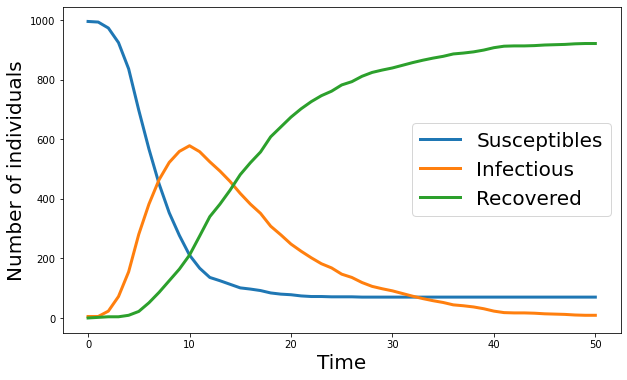

In [13]:
N = 1000
A_ba = generate_ba(N,2)
I0 = 5
T = 50
beta = 0.2
mu = 0.1

S_ba,I_ba,R_ba = sir_network(A_ba,I0,beta,mu,T)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S_ba, label='Susceptibles',lw=3)
ax.plot(I_ba, label='Infectious', lw=3)
ax.plot(R_ba, label='Recovered', lw=3)
ax.legend(fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

### Stochastic SIR Model on Erdős–Rényi–Gilbert network

Text(0, 0.5, 'Number of individuals')

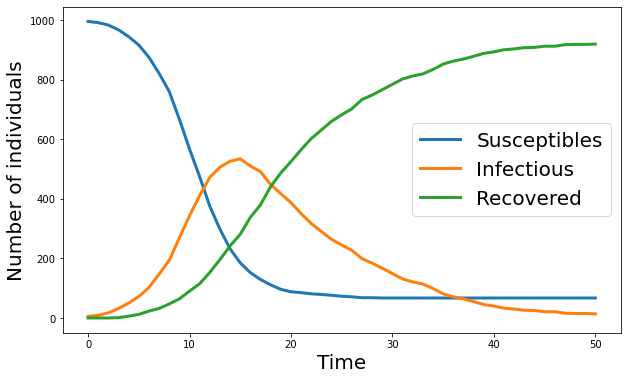

In [14]:
avg_k_ba = np.asarray(A_ba.sum(axis=0)).reshape(-1).mean()
p = avg_k_ba/(N-1)
A_er = generate_gilbert(N,p)

S_er,I_er,R_er = sir_network(A_er,I0,beta,mu,T)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S_er, label='Susceptibles',lw=3)
ax.plot(I_er, label='Infectious', lw=3)
ax.plot(R_er, label='Recovered', lw=3)
ax.legend(fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)

Text(0, 0.5, 'Number of individuals')

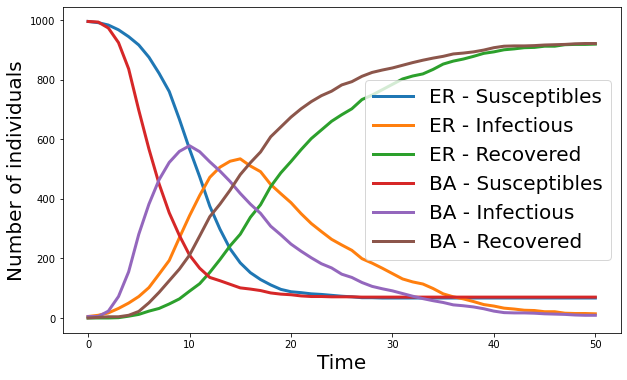

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(S_er, label='ER - Susceptibles',lw=3)
ax.plot(I_er, label='ER - Infectious', lw=3)
ax.plot(R_er, label='ER - Recovered', lw=3)
ax.plot(S_ba, label='BA - Susceptibles',lw=3)
ax.plot(I_ba, label='BA - Infectious', lw=3)
ax.plot(R_ba, label='BA - Recovered', lw=3)
ax.legend(fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Number of individuals', fontsize=20)